# Connor Hehn
## Homework 1

In [1]:
jungle = [
    [1,0,0,0],
    [1,1,0,1],
    [0,1,0,0],
    [1,1,1,1]
]

#### Valid Move Function

In [2]:
def is_valid_move(jungle,row,col):
    # Check if in bounds
    in_bounds = (0 <= row < len(jungle)) and (0 <= col < len(jungle[0]))
    if in_bounds:
        is_open = (jungle[row][col] == 1)
    else:
        is_open = False
    return (in_bounds and is_open)

#### Path finder function (recursion)

In [3]:
def find_solution(jungle,row,col,solution):
    
    # Check if solution is complete
    if ((row == len(jungle) -1) and (col == len(jungle[0]) - 1)):
        solution[row][col] = 1
        return True
    
    # Check valid move
    if is_valid_move(jungle,row,col):
        # If the move is valid -> set solution marker to 1
        solution[row][col] = 1

        # Attempt to move down 
        if find_solution(jungle,row+1,col,solution):
            return True
        
        # Attmept to move right
        if find_solution(jungle,row,col+1,solution):
            return True
        
        # If no solution found
        solution[row][col] = 0
    
    return False


#### Solve Function

In [4]:
def solve(jungle):
    
    # Find size of jungle
    num_rows = len(jungle)
    num_cols = len(jungle[0])

    # Set solution matrix
    solution =[[0] * num_cols for _ in range(num_rows)] 

    if find_solution(jungle,0,0,solution):
        return solution
    else:
        return None


#### Plot function

In [5]:
def plot(grid):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    plt.close('all')
    sns.set(font_scale = 2)
    plt.figure(figsize=(10,10))
    sns.heatmap(grid,linewidths=.8,cbar=False,linecolor='blue', xticklabels=False,yticklabels=False,
                cmap='Reds',center=0.4)
    plt.title("Jungle Solution")

#### Main

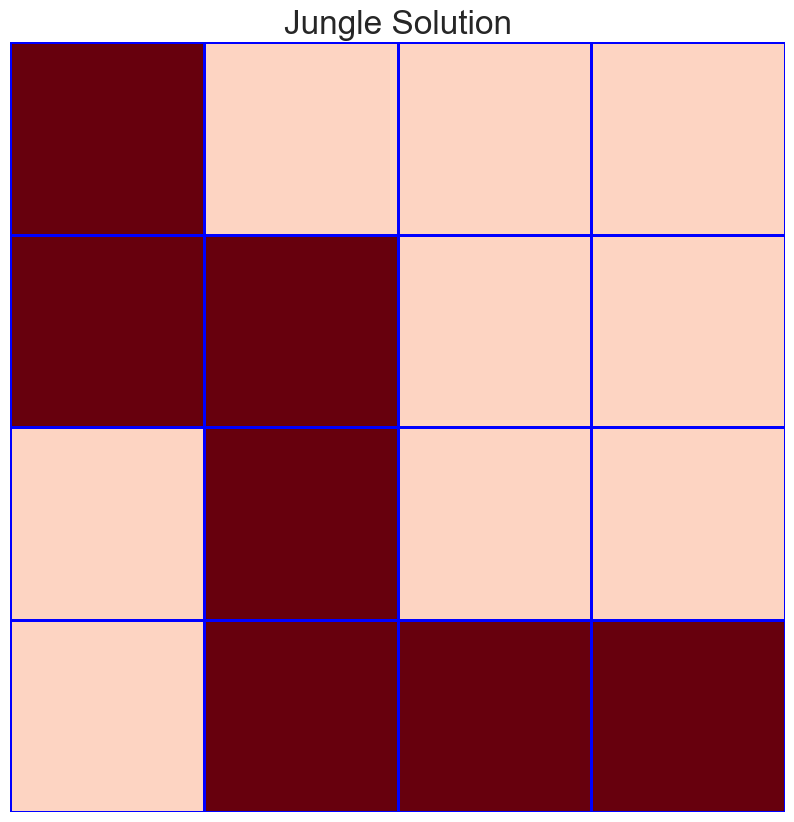

In [6]:
if __name__ == "__main__":

    # Solve solution
    solution = solve(jungle)

    if (solution != None):
        plot(solution)
    else:
        print("You are trapped in the maze!")